### Bivariate Analysis


Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two variables.

There are essentially 3 major scenarios that we will come accross when we perform bivariate analysis:
- Both variables of interest are qualitative
- One variable is qualitative and the other is quantitative
- Both variables are quantitative

#### Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

#### Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4. Swarm plot

#### Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/syeda/Downloads/master.csv')

In [3]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
data.shape

(27820, 12)

In [5]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
data.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Austria,NaN,male,75+ years,NaN,NaN,NaN,Kuwait2009,NaN,"311,528,948,848",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [9]:
pd.crosstab(index=data['age'],columns='count')

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


<AxesSubplot:xlabel='country'>

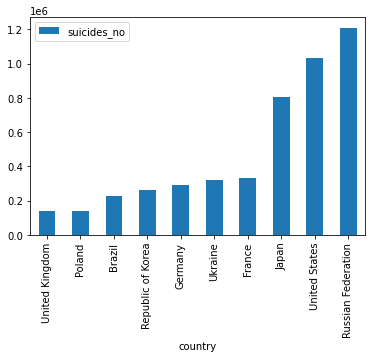

In [10]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',y='suicides_no',kind='bar')

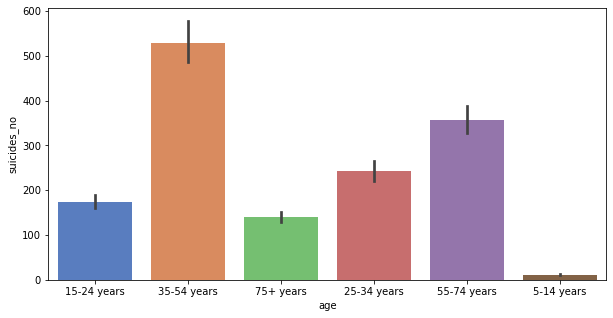

In [11]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

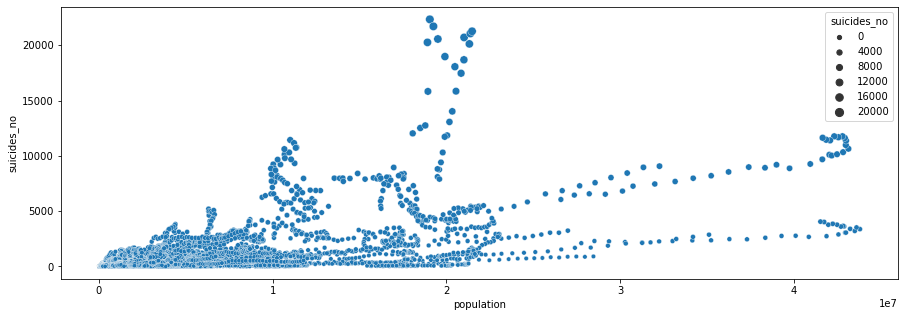

In [12]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x='population',y='suicides_no', data=data, size = "suicides_no") # scatter plot

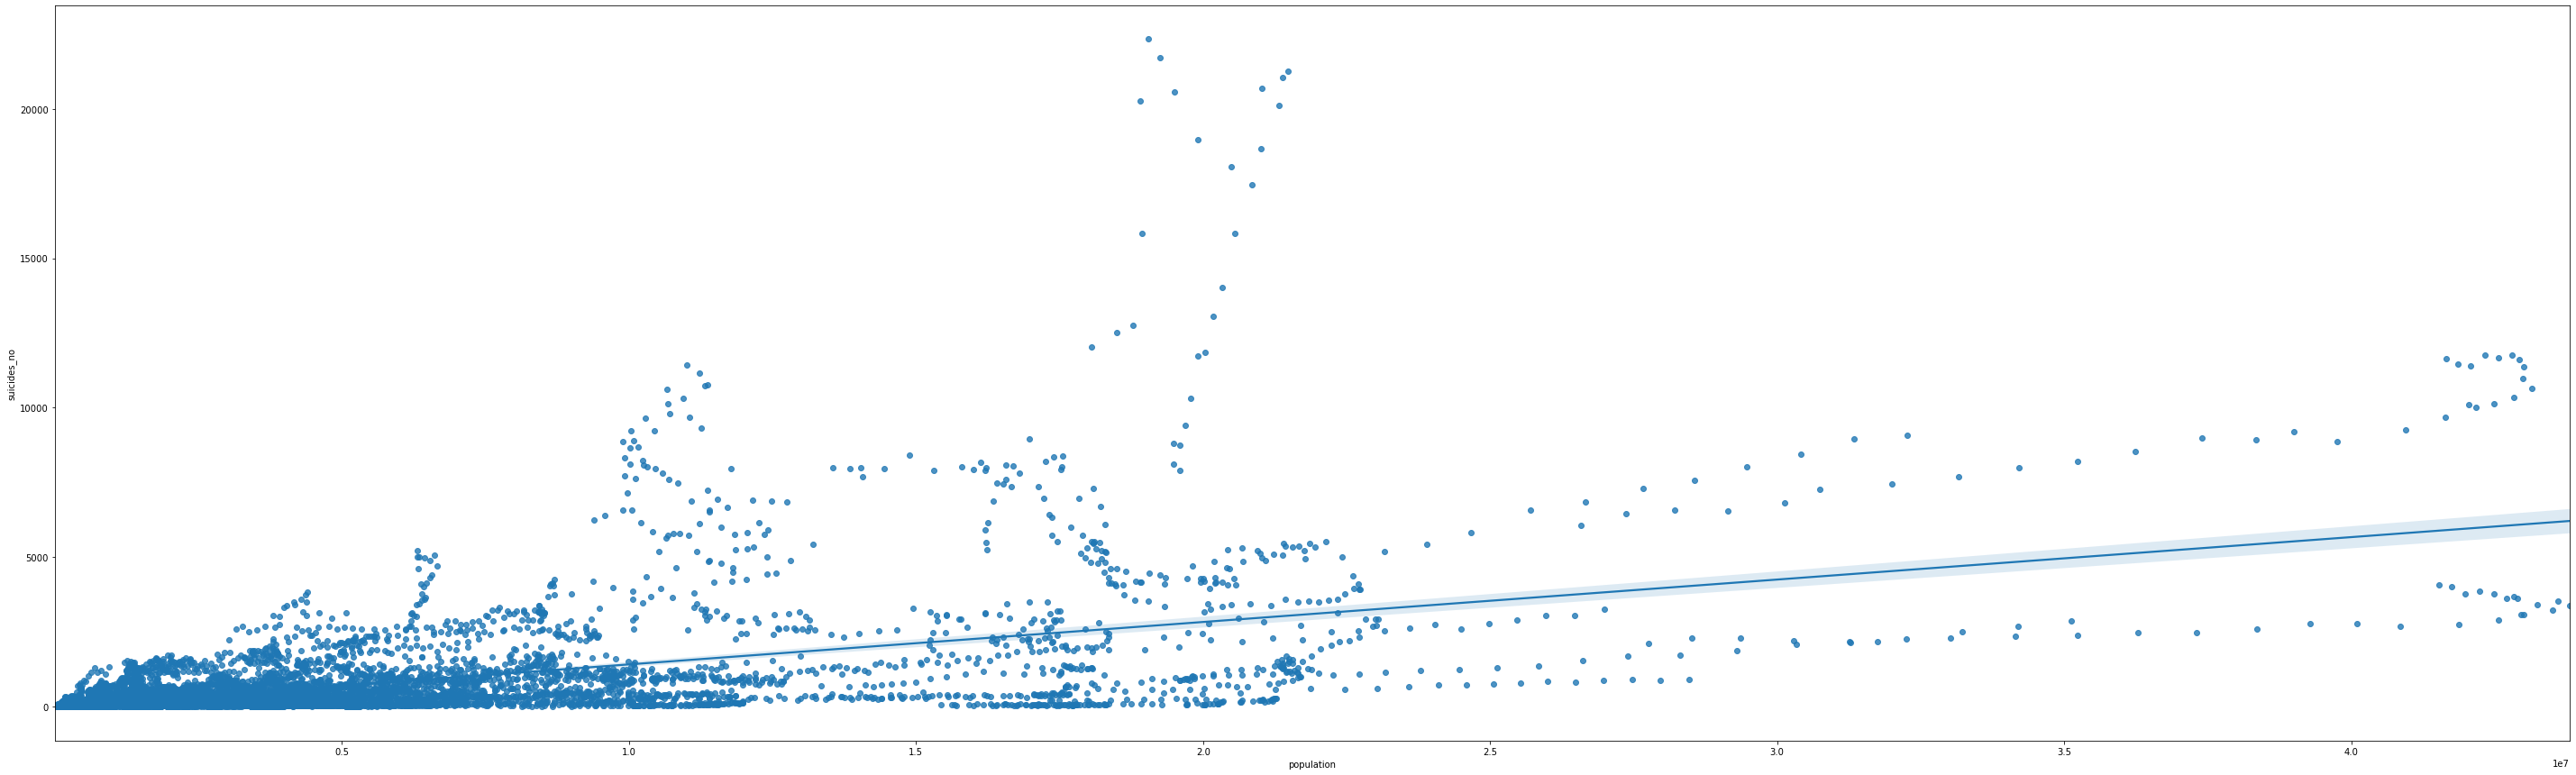

In [13]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data ) # regression plot - scatter plot with a regression line

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

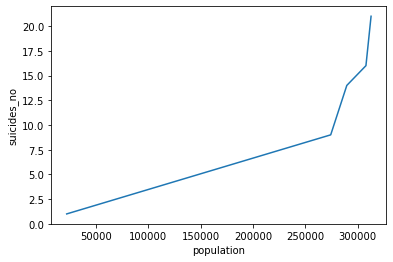

In [14]:
#Here we plotting a line plot.
sns.lineplot(x='population',y='suicides_no', data=data.head() )

<AxesSubplot:>

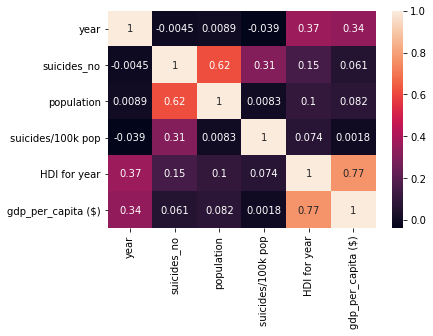

In [15]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

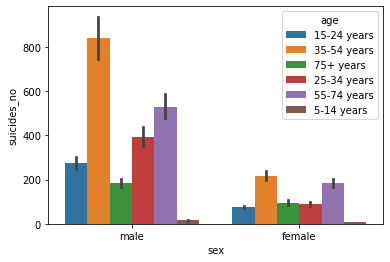

In [16]:
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')

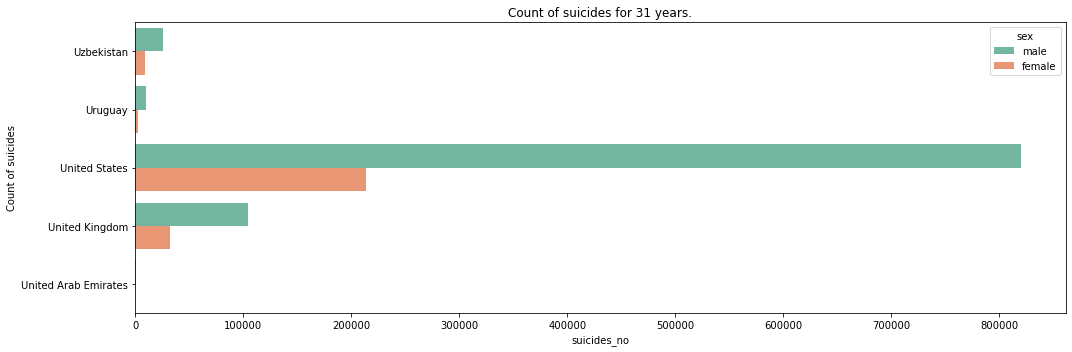

In [17]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_index(ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

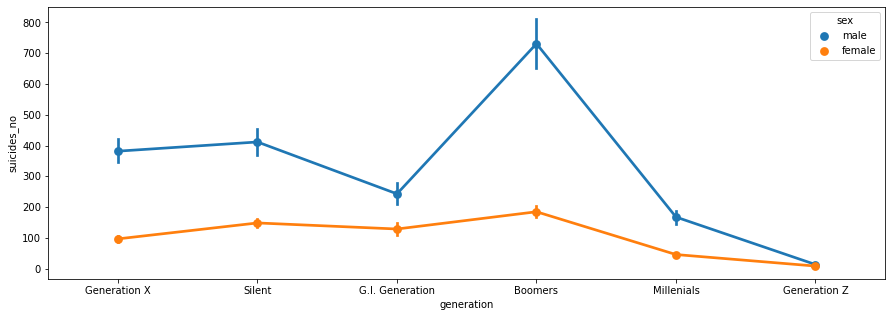

In [18]:
plt.figure(figsize=(15,5))

sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=data)
plt.show()

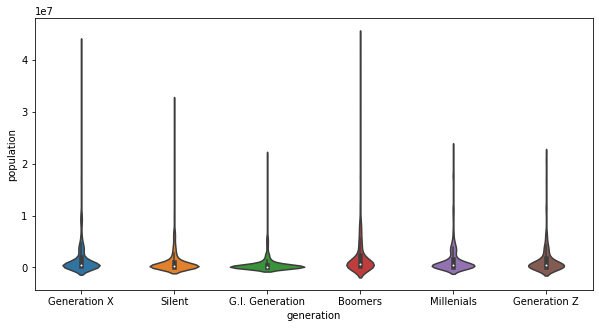

In [19]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

Temporal data is simply data that represents a state in time

<AxesSubplot:xlabel='year'>

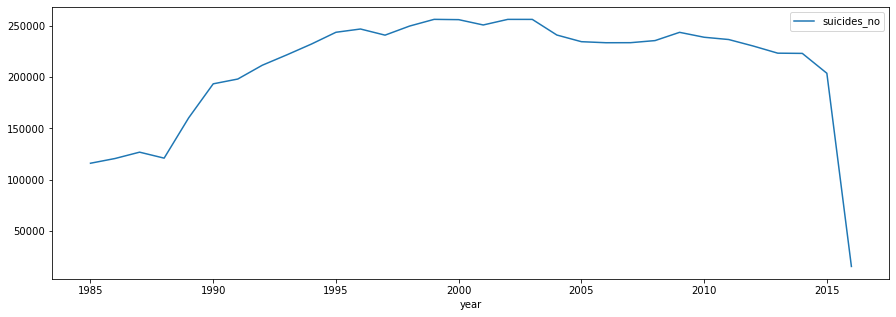

In [20]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

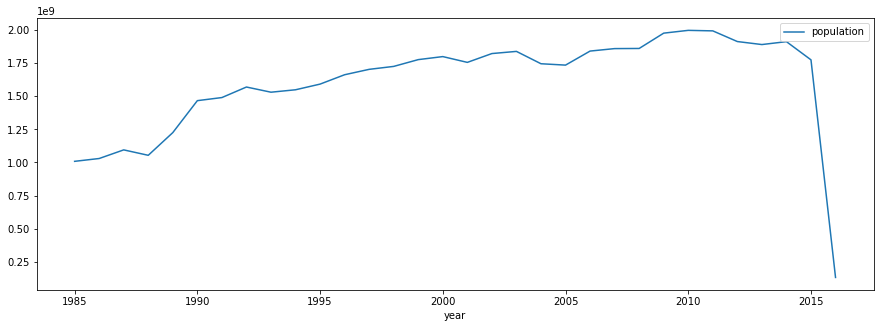

In [21]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()